In [0]:
!pip install scikit-plot 
#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

#libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import scikitplot as skplt 
import warnings
warnings.filterwarnings('ignore')

In [0]:
#importing the data and making a dataframe
data=pd.read_csv('https://raw.githubusercontent.com/IrenOkminyan/BUS288/master/ETH_USDT.csv')

In [0]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16922 entries, 0 to 16921
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close_time             16922 non-null  int64  
 1   volume_delta           16922 non-null  float64
 2   open_2_d               16922 non-null  float64
 3   open_-2_r              16922 non-null  float64
 4   cr                     16922 non-null  float64
 5   cr-ma1                 16922 non-null  float64
 6   cr-ma2                 16922 non-null  float64
 7   cr-ma3                 16922 non-null  float64
 8   volume_-3,2,-1_max     16922 non-null  float64
 9   volume_-3~1_min        16922 non-null  float64
 10  kdjk                   16922 non-null  float64
 11  kdjd                   16922 non-null  float64
 12  kdjj                   16922 non-null  float64
 13  open_2_sma             16922 non-null  float64
 14  macd                   16922 non-null  float64
 15  ma

In [0]:
#have a look at first rows of the dataframe
pd.set_option('display.max_columns', None)
data.head()

,Close_time,volume_delta,open_2_d,open_-2_r,cr,cr-ma1,cr-ma2,cr-ma3,"volume_-3,2,-1_max",volume_-3~1_min,kdjk,kdjd,kdjj,open_2_sma,macd,macds,macdh,boll,boll_ub,boll_lb,close_10.0_le_5_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge_5_fc,rsi_6,rsi_12,wr_10,wr_6,cci,cci_20,tr,atr,dma,pdi,mdi,dx,adx,adxr,trix,trix_9_sma,tema,vr,vr_6_sma,Open,Close,High,Low,Volume,Number_of_trades,target
0,1509645600,-489.387,-0.575241,-1.784156,116.349462,107.096477,102.231328,123.244161,2454.797,1843.859,63.060231,60.652600,67.875493,284.136849,0.294137,0.243930,0.050207,282.591824,288.847862,276.335786,0.0,False,5.0,50.075421,51.206282,37.157705,63.338662,93.155057,93.155057,6.736679,11.543543,0.052364,16.179479,16.524402,1.054683,29.961222,45.875935,0.053359,-0.000046,283.404953,63.709221,83.936735,283.465444,283.093313,289.586916,282.850237,1843.859,1673.0,1.0
1,1509649200,69.410,-4.233422,-0.611893,106.318287,108.815772,102.435270,93.854663,2317.122,1428.117,63.962479,61.755893,68.375650,283.265488,0.314502,0.259086,0.055416,282.727421,288.765846,276.688997,0.0,False,5.0,54.318594,53.756595,34.233026,48.965960,21.658731,21.658731,7.495871,11.024890,0.379451,14.187506,20.428356,18.028875,26.465661,40.189727,0.053891,0.014895,283.878420,74.664590,78.968962,283.065533,284.218995,286.317564,278.821694,1913.269,1822.0,1.0
2,1509652800,-485.152,-1.953084,0.202932,117.859816,111.211606,103.313102,98.941882,2333.246,1428.117,67.164201,63.558662,74.375280,283.553109,0.495034,0.309021,0.186013,283.073112,289.368995,276.777230,0.0,False,5.0,64.087697,59.860939,26.432353,29.692175,151.879889,151.879889,6.095389,10.427141,0.688878,18.684823,18.188723,1.345407,19.159577,34.073227,0.059452,0.031598,286.211867,82.841981,79.601350,284.040685,287.221402,290.314384,285.845968,1428.117,1187.0,-1.0
3,1509656400,173.069,4.066919,1.495563,114.220729,109.805032,105.113063,96.943577,1843.859,1428.117,61.795180,62.970835,59.443870,285.669820,0.533341,0.355949,0.177393,283.258012,289.463138,277.052887,0.0,False,5.0,56.549102,55.694560,30.484641,46.366142,99.920715,99.920715,8.426620,10.196073,1.333965,16.163297,20.336355,11.433145,16.923857,29.110886,0.063850,0.041253,286.085198,75.884591,75.344606,287.298955,285.661714,291.227922,282.801302,1601.186,1331.0,-1.0
4,1509660000,-171.028,0.301600,0.687607,111.530520,110.377693,104.870260,102.231328,1913.269,1428.117,56.094903,60.678858,46.926995,286.646362,0.413297,0.367837,0.045460,283.258586,289.237996,277.279176,0.0,False,5.0,46.475100,49.878823,62.367282,64.171816,46.736315,51.512194,7.854770,9.937059,0.903446,14.080628,18.942548,14.722752,16.289259,25.414298,0.062942,0.048162,284.257842,70.589445,73.153236,285.993770,283.266620,289.848790,281.994020,1430.158,1112.0,1.0


In [0]:
data.describe()

,Close_time,volume_delta,open_2_d,open_-2_r,cr,cr-ma1,cr-ma2,cr-ma3,"volume_-3,2,-1_max",volume_-3~1_min,kdjk,kdjd,kdjj,open_2_sma,macd,macds,macdh,boll,boll_ub,boll_lb,close_10.0_le_5_c,close_10.0_ge_5_fc,rsi_6,rsi_12,wr_10,wr_6,cci,cci_20,tr,atr,dma,pdi,mdi,dx,adx,adxr,trix,trix_9_sma,tema,vr,vr_6_sma,Open,Close,High,Low,Volume,Number_of_trades,target
count,1.692200e+04,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.0,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000,16922.000000
mean,1.540730e+09,-0.858309,0.037173,0.006287,111.495719,111.781151,112.271380,113.464769,10989.016631,5232.199882,49.891175,49.893530,49.886465,359.316600,-0.125493,-0.133033,0.007540,359.409162,373.009436,345.808887,0.0,4.997695,50.067016,49.986724,50.104815,50.103145,0.493643,0.223054,5.502820,5.515741,-0.365081,28.488722,28.547000,30.288307,30.332941,30.386097,-0.003299,-0.003279,359.294080,111.026822,111.215624,359.309326,359.291855,361.340197,357.230917,7945.909208,8402.112634,0.006855
std,1.787466e+07,5360.064590,9.993370,1.671403,51.619161,50.405684,52.834120,69.065411,8802.878850,3099.355520,20.815257,18.072380,32.780045,262.413871,7.082725,6.688230,2.042302,262.231106,276.780522,248.339097,0.0,0.061936,17.376628,13.030817,27.484275,27.866173,109.158260,113.184544,9.268254,7.426927,20.492665,13.088754,14.024576,21.522031,16.183387,14.291104,0.196539,0.191201,262.427103,55.187303,53.372249,262.434576,262.419810,264.473256,260.306588,6448.091125,6009.282721,1.000006
min,1.509646e+09,-64589.550000,-153.629159,-14.815188,16.198892,12.557113,13.036222,0.000000,977.960000,128.957000,2.899891,5.228458,-26.310999,82.537646,-74.956132,-67.127314,-25.756008,83.513962,84.846374,78.791565,0.0,3.000000,0.975617,4.673713,0.000000,0.000000,-466.666667,-649.595242,0.154475,0.415958,-208.567788,2.039937,2.069816,0.002067,4.002580,6.475111,-1.101147,-1.034363,82.373560,19.657420,21.595262,82.170858,82.156095,82.806365,82.054589,128.957000,140.000000,-1.000000
25%,1.525292e+09,-1545.356500,-1.647209,-0.570941,75.503935,76.622235,78.400018,82.013251,5753.062000,3224.770250,32.491784,35.815988,21.387758,172.068862,-1.264303,-1.230731,-0.412044,172.324979,175.980188,168.190576,0.0,5.000000,38.034782,41.832956,26.405972,26.039293,-77.094298,-78.653287,1.089152,1.407585,-3.671999,19.424906,18.684872,12.432469,17.578717,19.405276,-0.081255,-0.079443,172.075718,74.487635,75.705132,172.074582,172.058198,172.706916,171.427094,4250.088250,4635.000000,-1.000000
50%,1.540787e+09,-103.570500,-0.003705,0.001731,102.127759,102.765517,103.226443,103.984492,8370.350000,4393.043000,50.124606,50.051089,49.681550,243.815601,0.004291,0.018430,0.004447,244.009586,250.617230,237.442576,0.0,5.000000,50.492769,50.005286,49.803690,50.252675,2.769011,2.135035,2.398631,2.810526,0.033271,26.427733,26.184710,26.261791,26.686739,27.255734,0.000972,0.001040,243.570911,101.228518,102.183161,243.813294,243.749825,244.726182,242.726654,6107.943500,6541.000000,1.000000
75%,1.556153e+09,1330.440500,1.467249,0.620000,136.308673,136.306835,135.865251,134.796482,13018.440000,6310.398000,67.204103,63.909766,78.416678,476.098153,1.594125,1.518791,0.448645,475.503130,490.631131,462.990234,0.0,5.000000,62.060207,58.353623,73.650960,74.367900,77.088063,78.680702,5.845884,6.201230,4.690265,35.266961,35.554519,44.753809,39.877840,38.464041,0.090154,0.088133,475.989741,134.757667,134.263934,476.125911,476.100277,478.519390,474.294440,9443.975000,10209.000000,1.000000
max,1.571594e+09,87678.644000,169.865781,19.127073,545.

In [0]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index(['close_10.0_le_5_c'], dtype='object')


In [0]:
data.dropna(inplace=True)
data=data.drop(['close_10.0_le_5_c'],axis=1)

In [0]:
#Close_time number is a unique id number, so we will keep it setting to index
data.set_index(keys='Close_time', inplace=True)

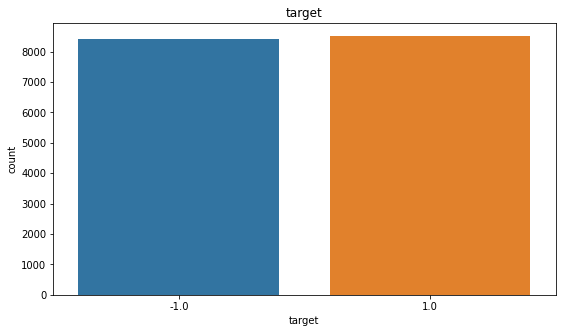

In [0]:
#let's visualise the distribution of change
plt.figure(figsize=(9, 5))
sns.countplot(data.target)
plt.title("target")
plt.show()

In [0]:
#lets count the benchmark for price change
data.target.value_counts(normalize=True).mul(100).rename("change percentage")

 1.0    50.342749
-1.0    49.657251
Name: change percentage, dtype: float64

In [0]:
# replacing -1 with 0
data.target=data.target.map({-1:0, 1:1})

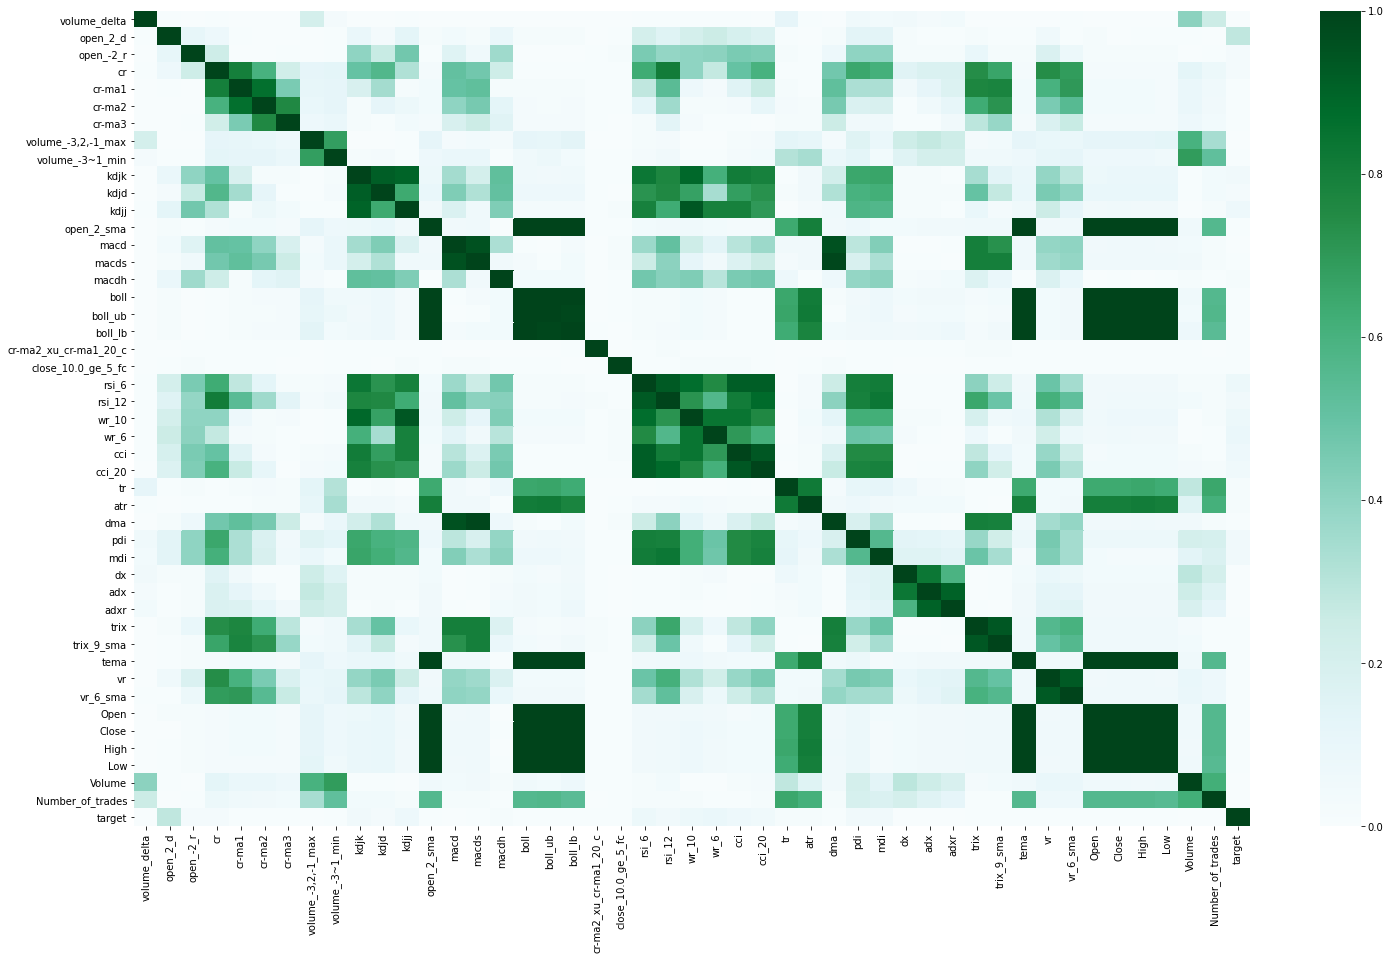

In [0]:
#Let's visualize correlations
plt.figure(figsize=(25,15))
sns.heatmap(data.corr().abs().round(2),annot=False, cmap = "BuGn")
plt.show()

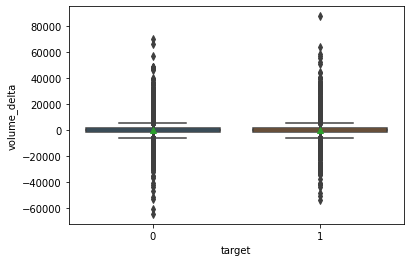

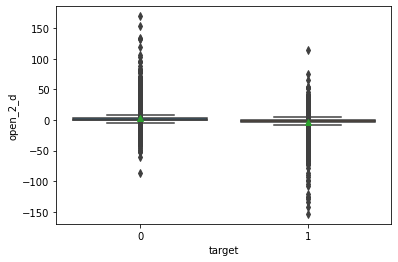

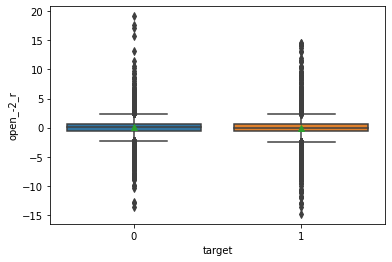

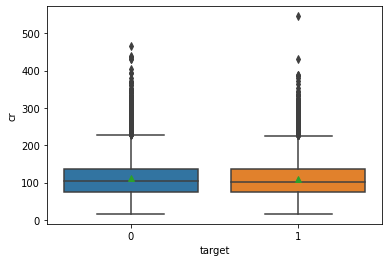

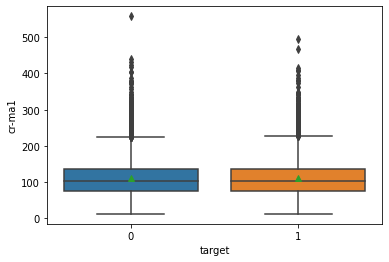

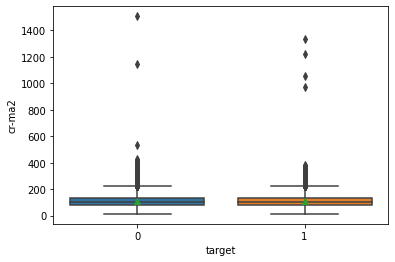

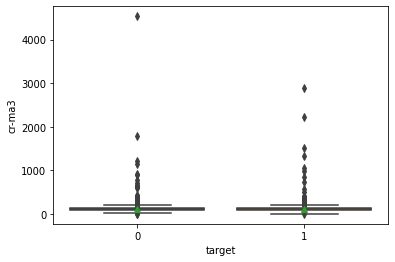

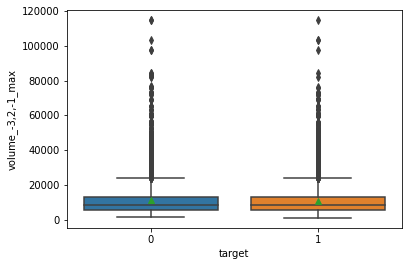

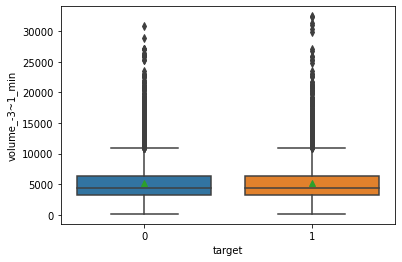

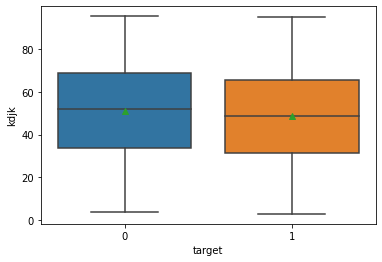

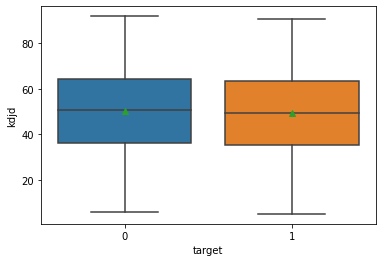

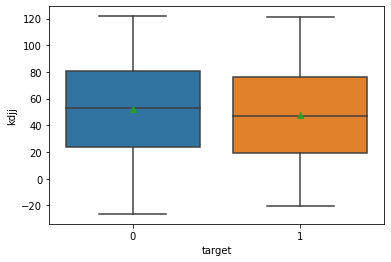

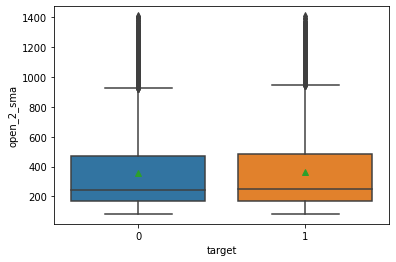

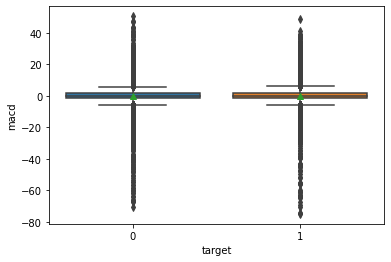

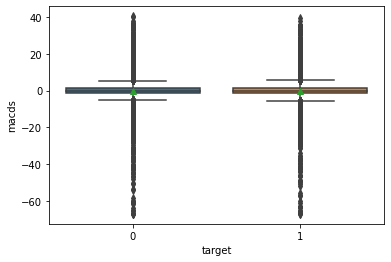

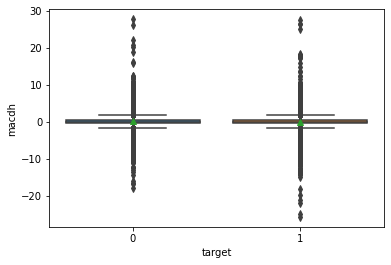

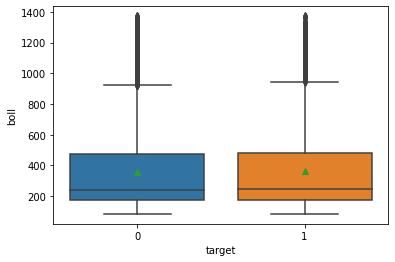

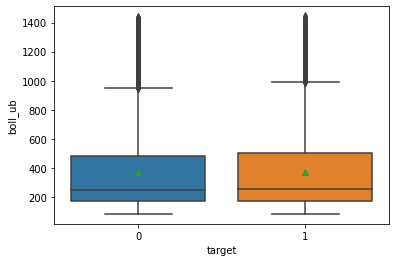

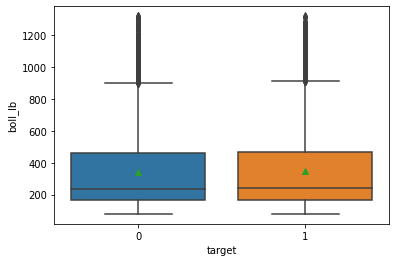

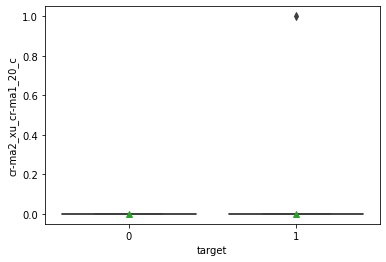

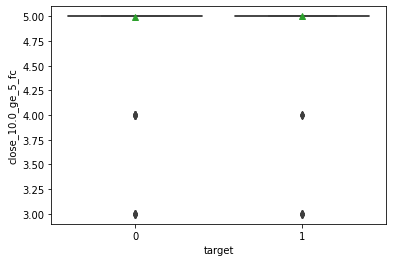

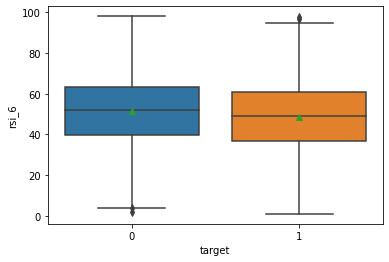

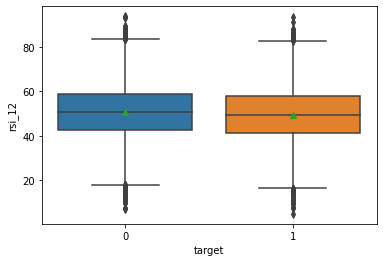

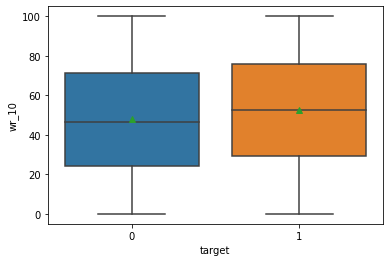

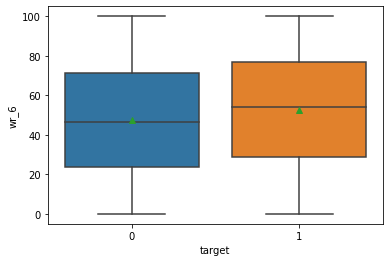

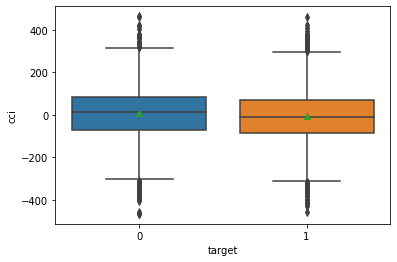

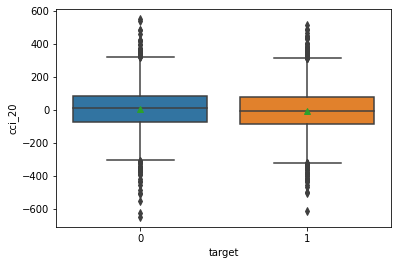

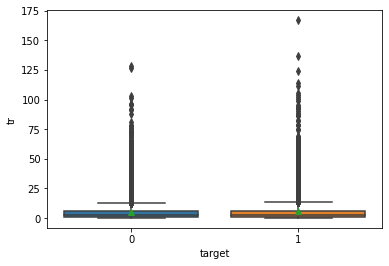

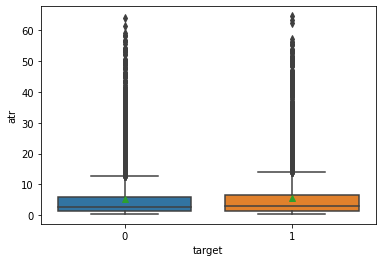

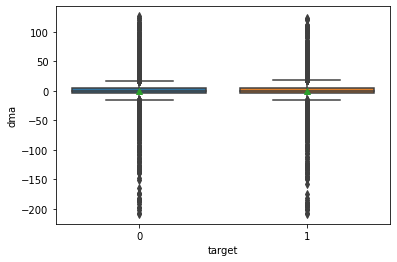

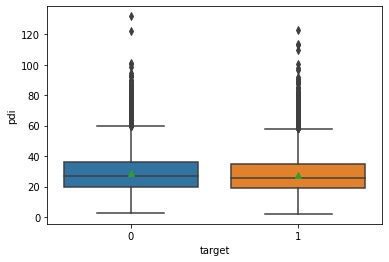

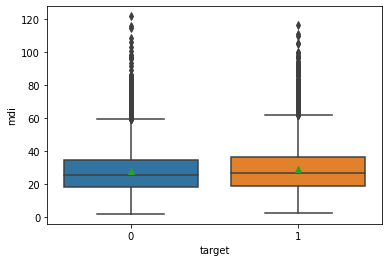

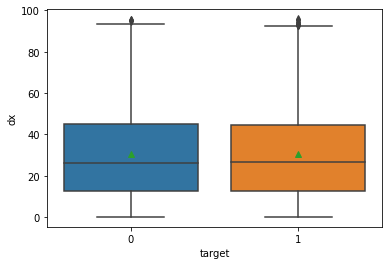

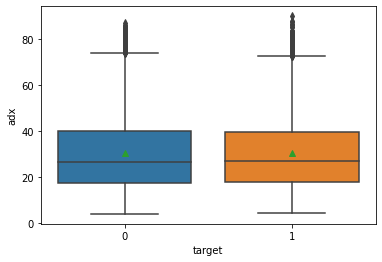

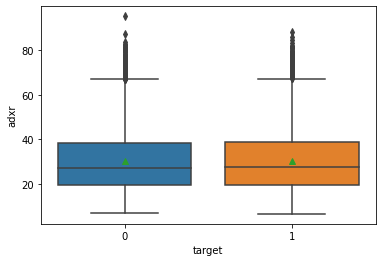

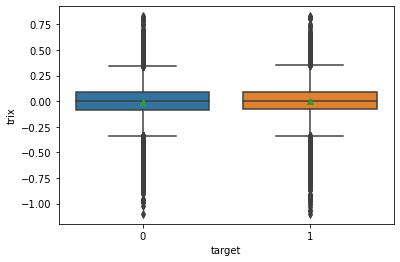

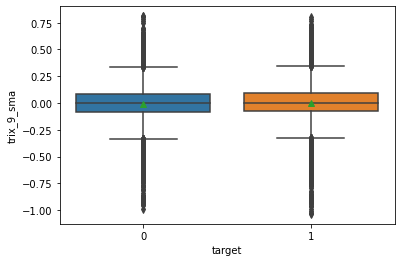

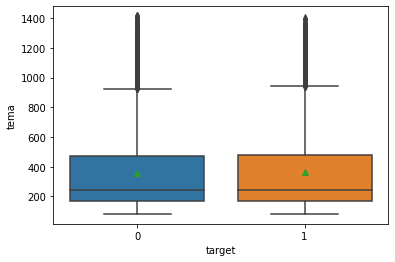

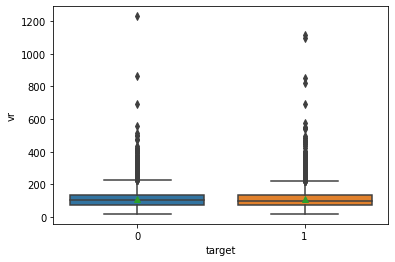

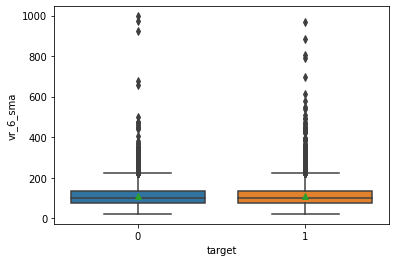

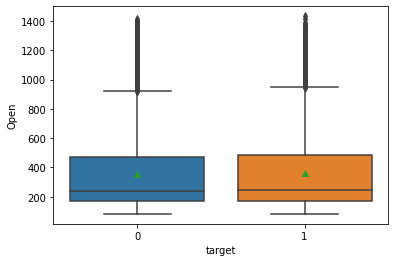

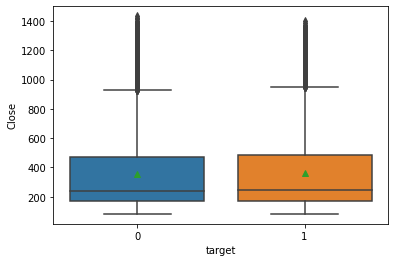

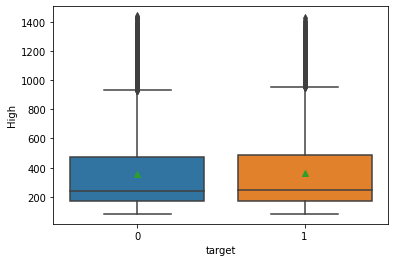

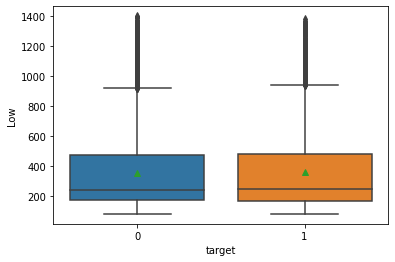

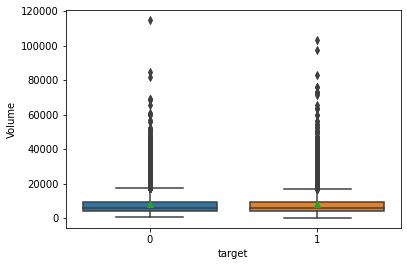

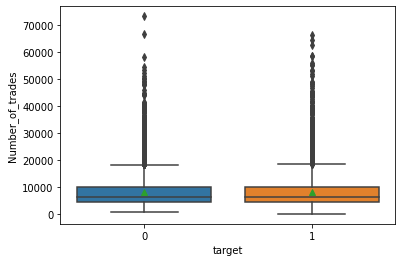

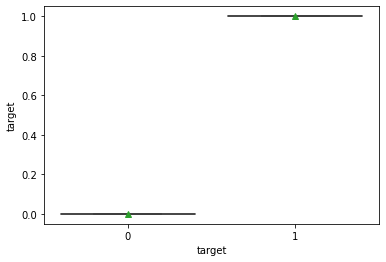

In [0]:
#Let's also see whether change differs by any of the categorical variables.
#to see that, let's visualize target by each numeric variable represented in boxplot.
numeric_colnames=data.dtypes[data.dtypes!="O"].index.tolist()
for colname in numeric_colnames:
    sns.boxplot(data=data,y=colname,x="target", showmeans=True)
    plt.show()

## `Data after filtering`

In [0]:
data.dropna(inplace=True)
data=data.drop(['close_10.0_ge_5_fc', 'cci_20', 'wr_6', 'rsi_12', 'trix_9_sma', 'open_2_sma', 'macds', 'boll', 'boll_lb', 'kdjj', 'kdjd', 'rsi_6', 'wr_10', 'cci', 'macd', 'boll_ub', 'adx', 'adxr', 'tema'],axis=1)
data=data.drop(['atr', 'vr', 'vr_6_sma','Open', 'Close', 'High', 'Low', 'volume_-3~1_min', 'kdjk', 'trix', 'cr', 'cr-ma1', 'cr-ma2', 'cr-ma3'], axis = 1)
data=data.drop(['Volume', 'Number_of_trades', 'mdi', 'tr', 'volume_-3,2,-1_max'], axis = 1)
#data_logit = data_logit.drop(['pdi', 'macdh',], axis = 1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16922 entries, 1509645600 to 1571594400
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   volume_delta           16922 non-null  float64
 1   open_2_d               16922 non-null  float64
 2   open_-2_r              16922 non-null  float64
 3   macdh                  16922 non-null  float64
 4   cr-ma2_xu_cr-ma1_20_c  16922 non-null  bool   
 5   dma                    16922 non-null  float64
 6   pdi                    16922 non-null  float64
 7   dx                     16922 non-null  float64
 8   target                 16922 non-null  int64  
dtypes: bool(1), float64(7), int64(1)
memory usage: 1.2 MB


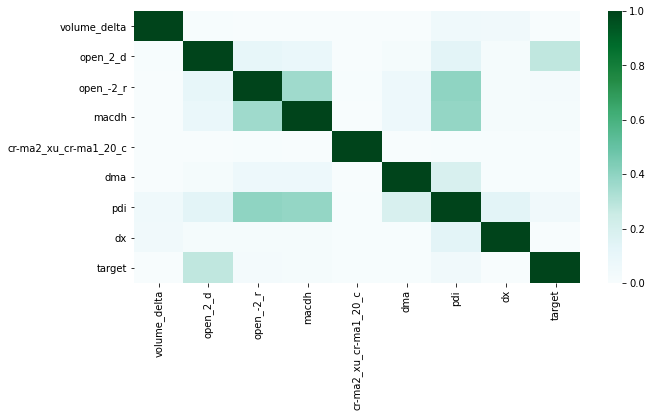

In [0]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=False, cmap = "BuGn")
plt.show()